In [116]:
import pandas as pd
df=pd.read_excel('dataset.xlsx')

In [117]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [118]:
#Finding missing values & dublicates & Structure of data
print(df.isnull().sum())
print(df.shape)
print(df.duplicated().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(303, 14)
1


In [119]:
# Clear the duplicates 
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [120]:
#Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [121]:
#Identify the categorical  data variables  
cat=[]
for i in df.columns:
  if(df.loc[:,i].unique().size <= 10):
    cat.append(i)
  else:continue
cat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [122]:
#describe the categorical variable
df[cat]

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


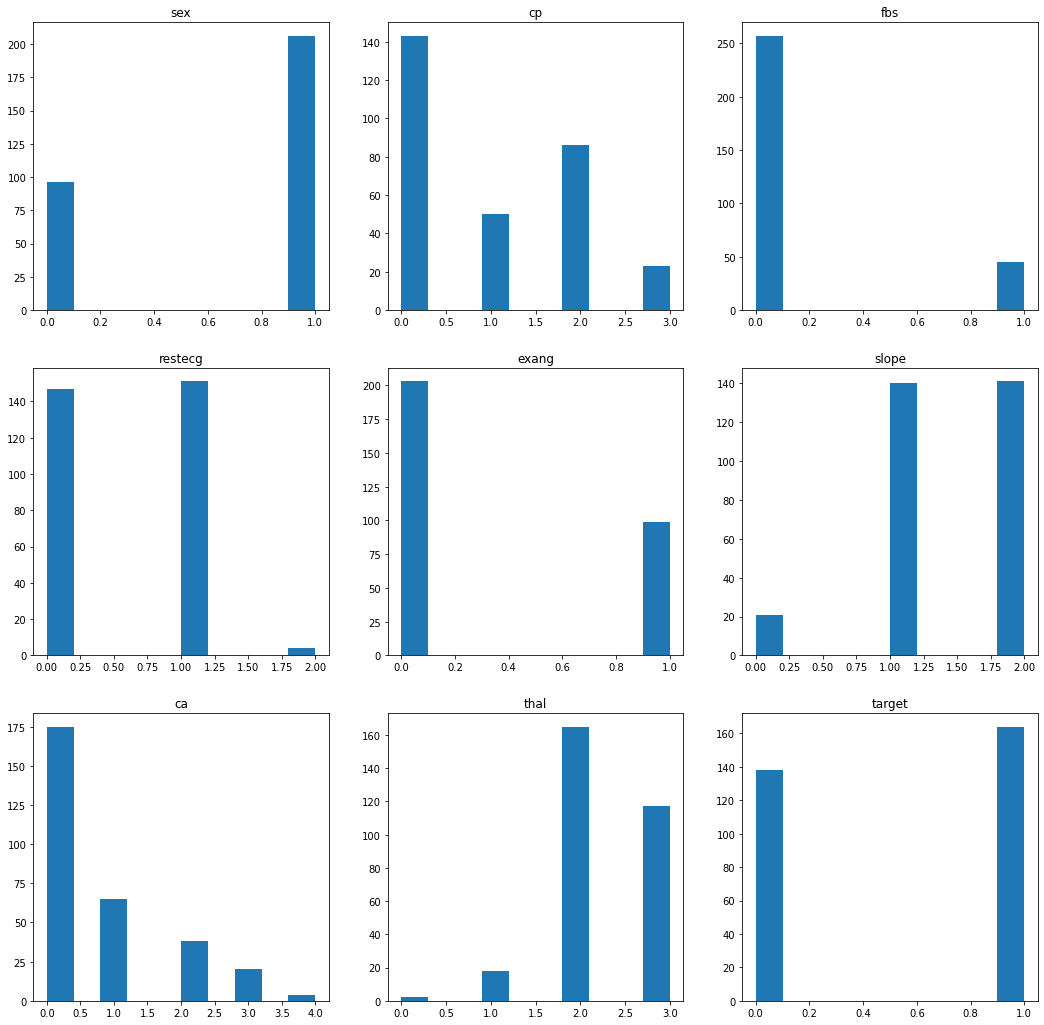

In [123]:

import matplotlib.pyplot as plt
fig,axes=plt.subplots(3,3,figsize=(18,18))

c=0
d=0
f=0
while(c<3):
  d=0
  while(d<3):
    axes[c][d].hist(df[cat[f]])
    axes[c][d].set_title(cat[f])
    d+=1
    f+=1
  c+=1

Text(0.5, 1.0, '86% - CVD')

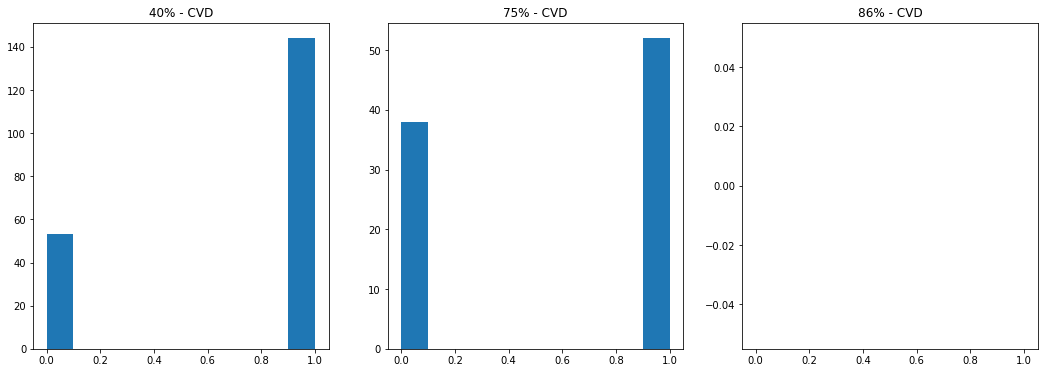

In [124]:
#occurrence of CVD across the Age category
cvd_40=df[(df['age']<=59) & (df['age']>=40)]
cvd_75=df[(df['age']>59) & (df['age']<=79)]
cvd_86=df[df['age']>=80]
fig,axes=plt.subplots(1,3,figsize=(18,6))
axes[0].hist(cvd_40['sex'])
axes[0].set_title('40% - CVD')
axes[1].hist(cvd_75['sex'])
axes[1].set_title('75% - CVD')
axes[2].hist(cvd_86['sex'])
axes[2].set_title('86% - CVD')


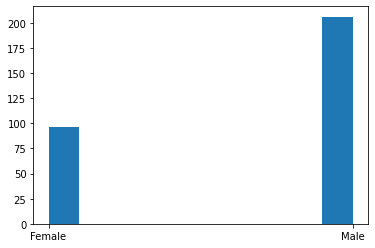

In [125]:
#Study the composition of all patients with respect to the Sex category
plt.hist(df['sex'])
plt.xticks([1,0],['Male','Female'])
plt.show()

In [126]:
male=df[df['sex']==1]
female=df[df['sex']==0]

In [127]:
#Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
g=df[df['target']==1]['trestbps']

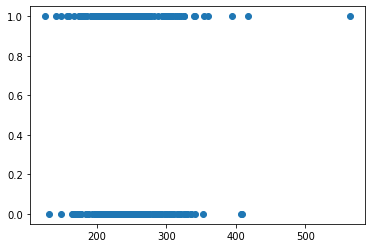

,chol,target
chol,1.000000,-0.081437
target,-0.081437,1.000000


In [128]:
#Describe the relationship between cholesterol levels and a target variable
plt.scatter(df['chol'],df['target'])
plt.show()
df.loc[:,['chol','target']].corr()

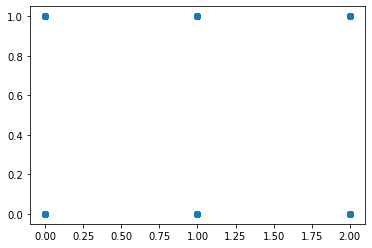

,slope,target
slope,1.00000,0.34394
target,0.34394,1.00000


In [129]:
#State what relationship exists between peak exercising and the occurrence of a heart attack
plt.scatter(df['slope'],df['target'])
plt.show()
df.loc[:,['slope','target']].corr()

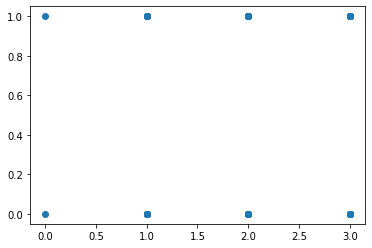

In [130]:
#h.	Check if thalassemia is a major cause of CVD
g=df[df['thal']<=6][df['thal']>=3]
plt.scatter(df['thal'],df['target'])

In [131]:
#i.	List how the other factors determine the occurrence of CVD
df[df['target']==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1


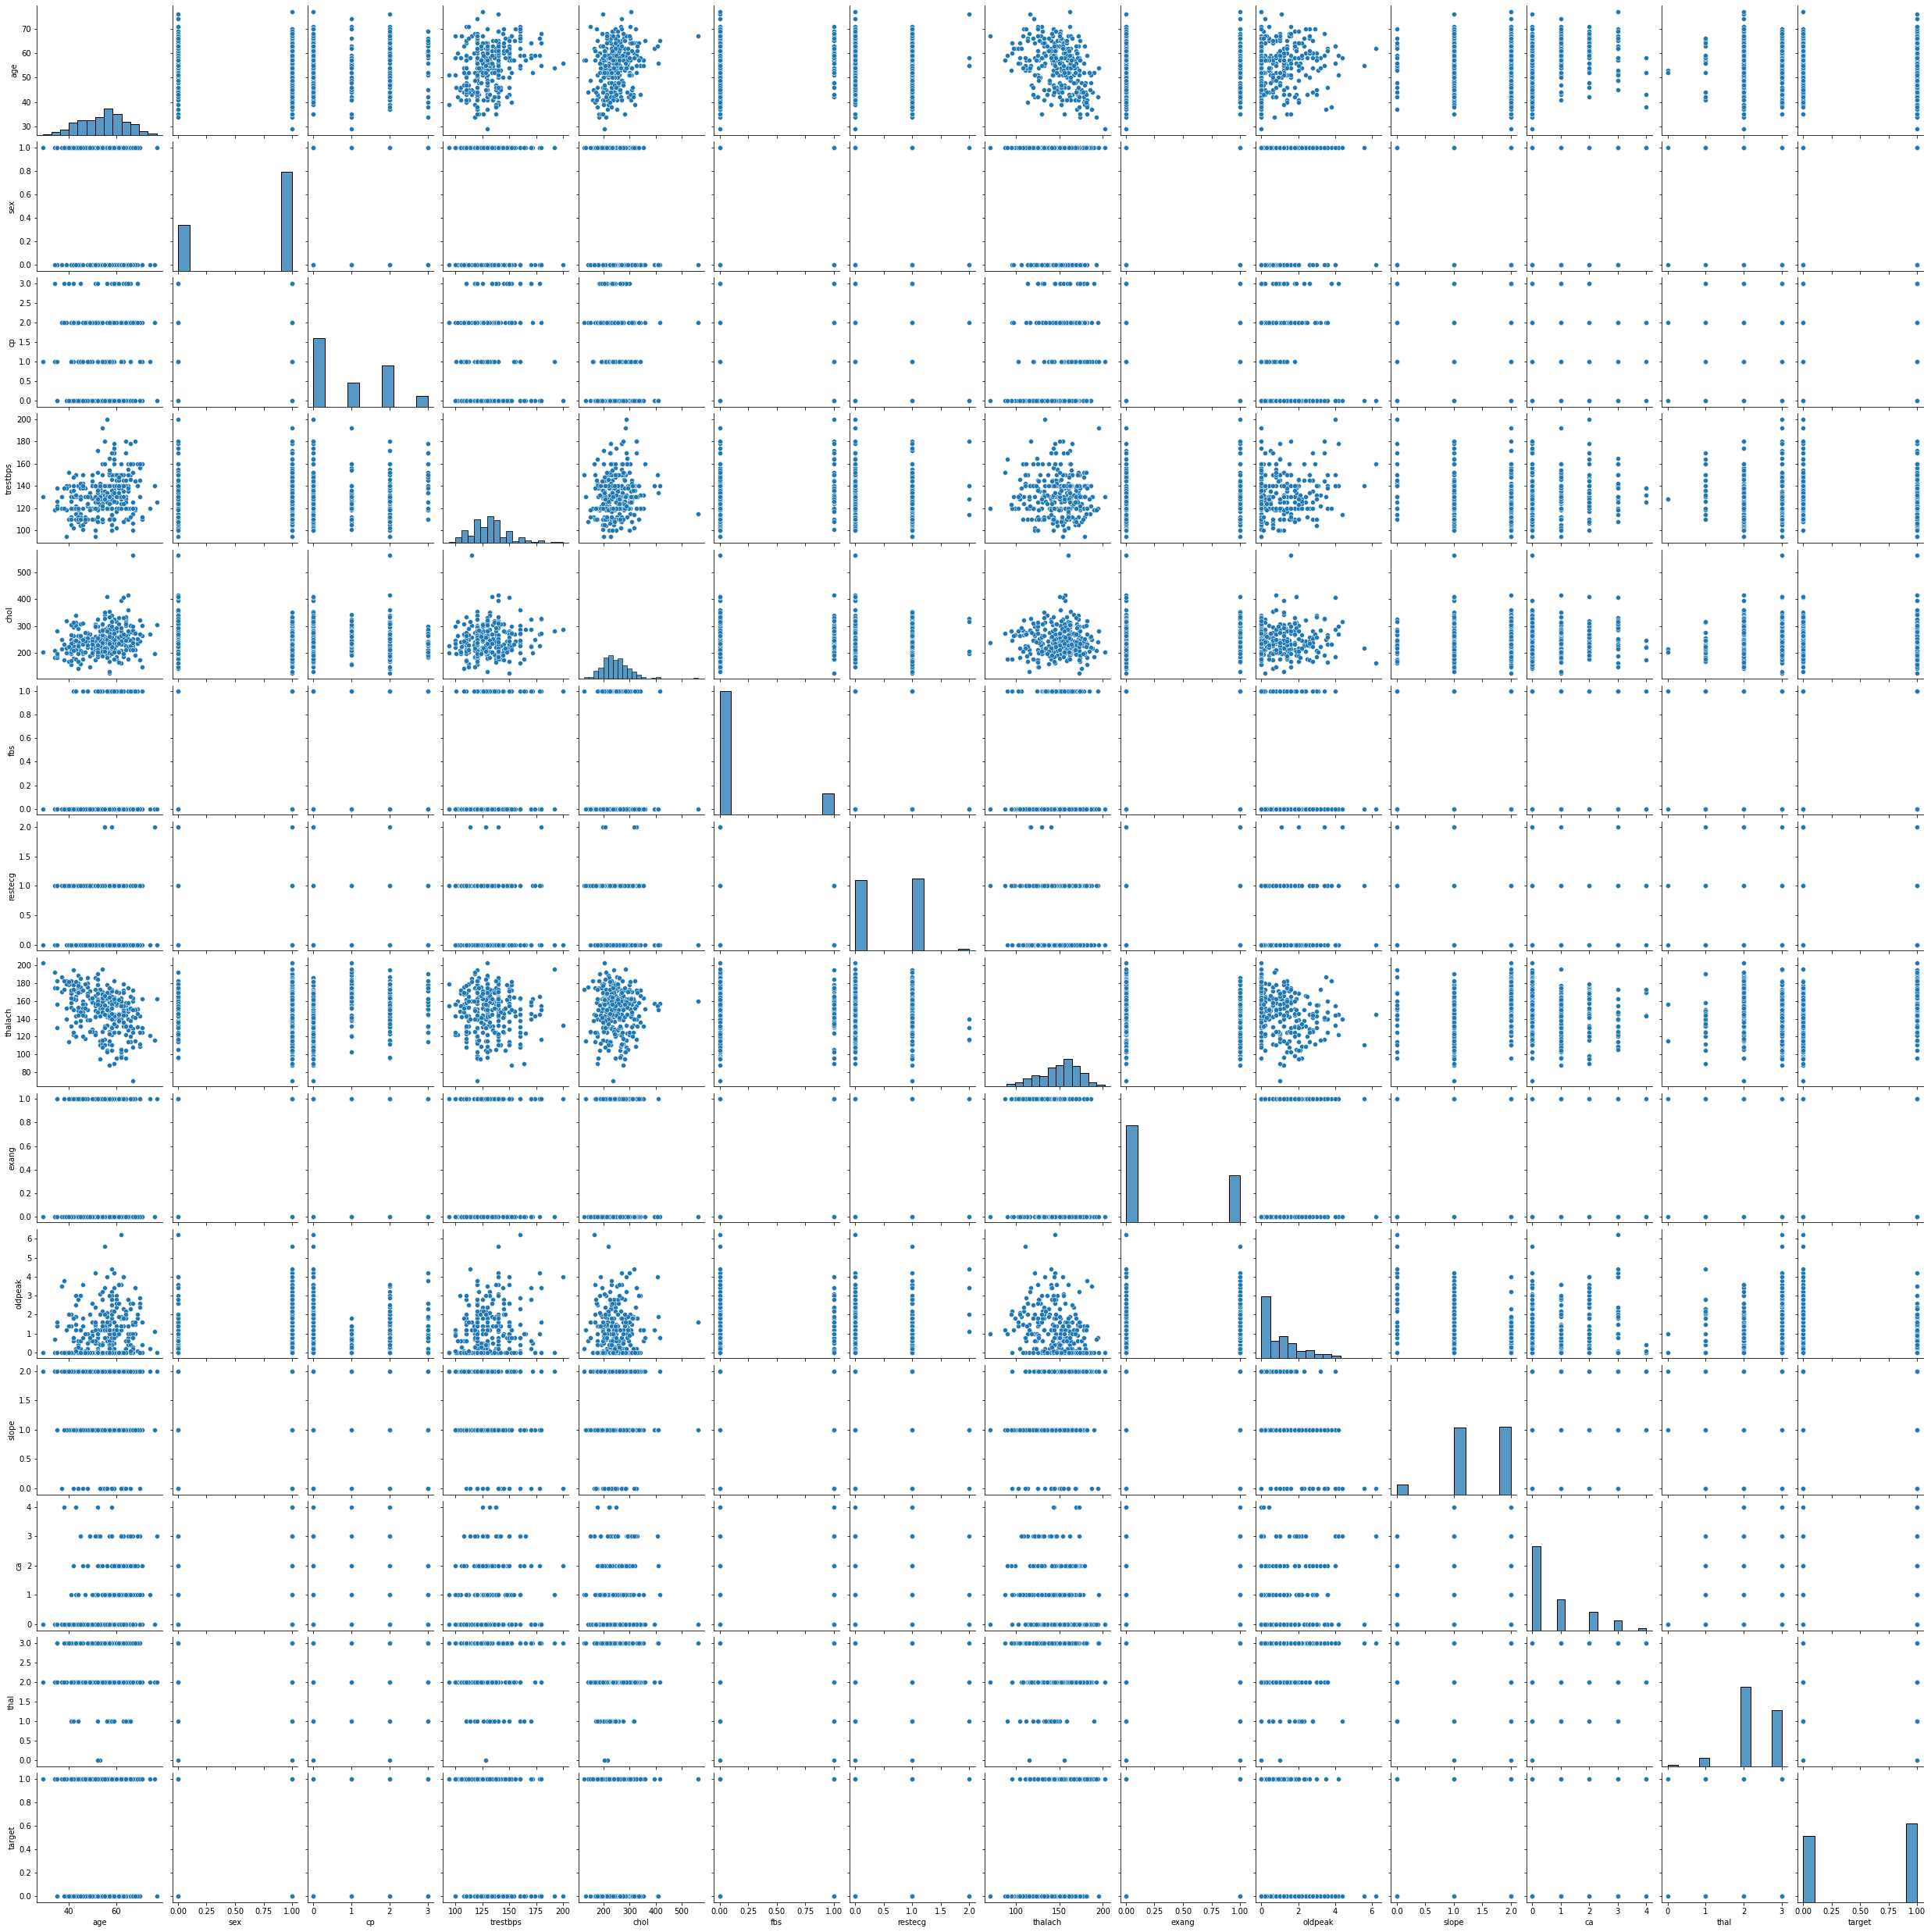

In [132]:
#j.	Use a pair plot to understand the relationship between all the given variables
import seaborn as sns
sns.pairplot(df)

3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [286]:
x=df.drop('target',axis=1)
y=df['target']

In [287]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [288]:
x=x[['cp','thalach','slope','exang','oldpeak','ca','thal','sex']]

In [289]:
df.corr()['target'].sort_values()

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
target      1.000000
Name: target, dtype: float64

In [290]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(x)

In [291]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(scaled,y,test_size=0.3)

In [292]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [293]:
classifier.fit(xtrain,ytrain)
pred=classifier.predict(xtest)

In [294]:
import numpy as np
np.corrcoef(pred,ytest)

array([[1.        , 0.62482182],
       [0.62482182, 1.        ]])

In [295]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,ytest)
acc

0.8131868131868132

In [296]:
from sklearn.ensemble import RandomForestClassifier 
RFC=RandomForestClassifier()
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [297]:
pred=RFC.predict(xtest)

In [298]:
np.corrcoef(pred,ytest)

array([[1.       , 0.5583013],
       [0.5583013, 1.       ]])